In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

import seaborn as sns
sns.set_theme()

FIGURE_PATH = pathlib.Path('../report/figures/out/')

color_classic = (0, 0, 0.8)
color_showdown = (0.8, 0, 0)

data = pd.read_csv('data/project_data.csv', index_col=0) # , nrows=100000)
display(data)

,contest_id,roster_slot_id,player_id,entry_count,usage_ratio,season,double_up,draft_group_id,fifty_fifty,guaranteed,...,projection_std,projection_value_ratio_mean,projection_value_ratio_max,projection_value_ratio_std,salary_vor,projection_vor,projection_value_ratio_vor,salary_vum,projection_vum,projection_value_ratio_vum
0,163439930,DST,323,934,0.042827,2024,f,109136,f,t,...,1.049974,107.834930,126.666667,11.036855,0.560930,1.392891,1.212047,-1.302805,0.000000,-0.494212
1,163439930,DST,324,934,0.084582,2024,f,109136,f,t,...,1.049974,107.834930,126.666667,11.036855,-0.090473,1.011930,1.706259,-1.954208,-0.380962,0.000000
2,163439930,DST,325,934,0.062099,2024,f,109136,f,t,...,1.049974,107.834930,126.666667,11.036855,-0.741875,-0.035715,1.135780,-2.605610,-1.428607,-0.570479
3,163439930,DST,326,934,0.044968,2024,f,109136,f,t,...,1.049974,107.834930,126.666667,11.036855,0.778064,1.297651,0.755790,-1.085671,-0.095240,-0.950470
4,163439930,DST,327,934,0.033191,2024,f,109136,f,t,...,1.049974,107.834930,126.666667,11.036855,1.646601,1.202411,-0.471452,-0.217134,-0.190481,-2.177712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964812,172306485,WR,1213799,99,0.121212,2024,f,119182,f,t,...,5.810793,96.042418,152.261905,23.837410,-0.588089,-0.425235,0.010053,-2.778721,-3.109730,-2.348403
2964813,172306485,WR,1213865,99,0.050505,2024,f,119182,f,t,...,5.810793,96.042418,152.261905,23.837410,0.152903,-0.031141,0.001511,-2.037729,-2.715636,-2.356945
2964814,172306485,WR,1218643,99,0.373737,2024,f,119182,f,t,...,5.810793,96.042418,152.261905,23.837410,1.079143,0.855141,0.722191,-1.111488,-1.829354,-1.636265
2964815,172306485,WR,1286176,99,0.040404,2024,f,119182,f,t,...,5.810793,96.042418,152.261905,23.837410,-0.896836,-0.888167,-1.055487,-3.087468,-3.572662,-3.413943


In [2]:
# remove players with 0 usage and do a log usage column
filter_gt_0_usage = data['usage_ratio'] > 0.0
usage_data_nonzero = data.loc[filter_gt_0_usage].copy()
usage_data_nonzero['log_usage'] = np.log10(usage_data_nonzero['usage_ratio'])

feature_cols = [
    'contest_id', 'roster_slot_id', 'player_id', 'week', 'contest_type', 'entry_count',
    'competition_id', 'player_name', 'position',
    'usage_ratio', 'log_usage', 'double_up',
    'payout',
    'entries_max', 'entries_fee', 
    'games_count', 'multientry', 'max_entry_fee', 
    'salary', 'projection',
    'projection_value_ratio', 'salary_mean', 'salary_max', 'salary_std',
    'projection_mean', 'projection_max', 'projection_std',
    'projection_value_ratio_mean', 'projection_value_ratio_max',
    'projection_value_ratio_std', 'salary_vor', 'projection_vor',
    'projection_value_ratio_vor', 'salary_vum', 'projection_vum',
    'projection_value_ratio_vum'
]
usage_data_nonzero = usage_data_nonzero[feature_cols]
print(usage_data_nonzero.columns)

Index(['contest_id', 'roster_slot_id', 'player_id', 'week', 'contest_type',
       'entry_count', 'competition_id', 'player_name', 'position',
       'usage_ratio', 'log_usage', 'double_up', 'payout', 'entries_max',
       'entries_fee', 'games_count', 'multientry', 'max_entry_fee', 'salary',
       'projection', 'projection_value_ratio', 'salary_mean', 'salary_max',
       'salary_std', 'projection_mean', 'projection_max', 'projection_std',
       'projection_value_ratio_mean', 'projection_value_ratio_max',
       'projection_value_ratio_std', 'salary_vor', 'projection_vor',
       'projection_value_ratio_vor', 'salary_vum', 'projection_vum',
       'projection_value_ratio_vum'],
      dtype='object')


# Summarize the dataset

## ID columns - not used in the analysis except maybe for grouping / stratification

- contest_id
- player_id
- season
- draft_group_id
- head_to_head
- contest_name
- starred
- starts_at
- id (this is the entry id?)
- team_id
- team_abbreviation
- swappable
- disabled

## Roster slot IDs

Describe the roster constructions of Classic vs. Showdowns and how they relate to a player's position

### Classic

| Roster Slot | Eligible Positions |
| ----------- | ------------------ |
| QB | QB |
| RB | RB |
| RB | RB |
| WR | WR |
| WR | WR |
| WR | WR |
| TE | TE | 
| FLEX | RB, WR, TE |
| DST | DST |

## Player ID

In [3]:
# How many of each contest type do we have

# How are the contests distributed among the weeks of the season

# Payouts, number of entries
## Break down by single entry vs. multientry, and contest type

# what does the usage distribution look like for small, medium, and large contests?

In [4]:
# number of each contest type
pd.set_option('display.float_format', lambda x: '%.0f' % x)
print(usage_data_nonzero['contest_type'].value_counts())
pd.reset_option('display.float_format')

contest_type
Classic     2512546
Showdown     452271
Name: count, dtype: int64


,week,contest_type,count
2,1,Classic,922
4,1,Showdown,908
5,2,Classic,893
14,2,Showdown,706
31,3,Showdown,311
26,3,Classic,549
22,4,Classic,574
32,4,Showdown,277
33,5,Showdown,276
23,5,Classic,570


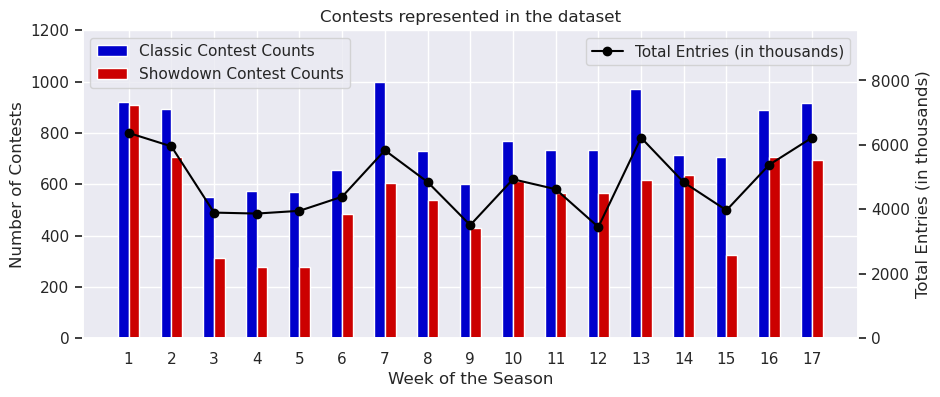

In [5]:
# week counts
pd.set_option('display.float_format', lambda x: '%.0f' % x)

unique_contests = usage_data_nonzero[['week', 'contest_type', 'contest_id', 'entry_count']].drop_duplicates()[['week', 'contest_type', 'entry_count']].copy()
week_counts = unique_contests[['week', 'contest_type']].value_counts().reset_index().sort_values(by='week').copy()
entry_counts = unique_contests.groupby(['week'])['entry_count'].sum().reset_index().rename(columns={'entry_count': 'total_entries'})
display(week_counts)

filter_classic = (week_counts['contest_type'] == 'Classic')
filter_showdown = (week_counts['contest_type'] == 'Showdown')

plt.figure(figsize=(10, 4))
plt.bar(week_counts.loc[filter_classic, 'week']-0.125, week_counts.loc[filter_classic, 'count'], color=color_classic, width=0.25, label='Classic Contest Counts')
plt.bar(week_counts.loc[filter_showdown, 'week'] + 0.125, week_counts.loc[filter_showdown, 'count'], color=color_showdown, width=0.25, label='Showdown Contest Counts')

ax1 = plt.gca()
ax2 = ax1.twinx()
max_entry_count = entry_counts['total_entries'].max()
entry_counts['total_entries'] = entry_counts['total_entries']
ax2.plot(entry_counts['week'], entry_counts['total_entries'] / 1.0e3, color='black', marker='o', label='Total Entries (in thousands)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Total Entries (in thousands)')
ax1.set_ylim(0, 1200)
ax2.set_ylim(0, 1.5 * max_entry_count / 1.0e3)
ax2.grid(False)
# ax2.set_yticklabels(ax1.get_yticks())
plt.sca(ax1)
plt.xticks(list(week_counts['week'].unique()))
plt.xlabel('Week of the Season')
plt.ylabel('Number of Contests')
plt.title('Contests represented in the dataset')
plt.savefig(FIGURE_PATH / 'contest_counts_by_week.png', bbox_inches='tight', dpi=300)
plt.show()



pd.reset_option('display.float_format')

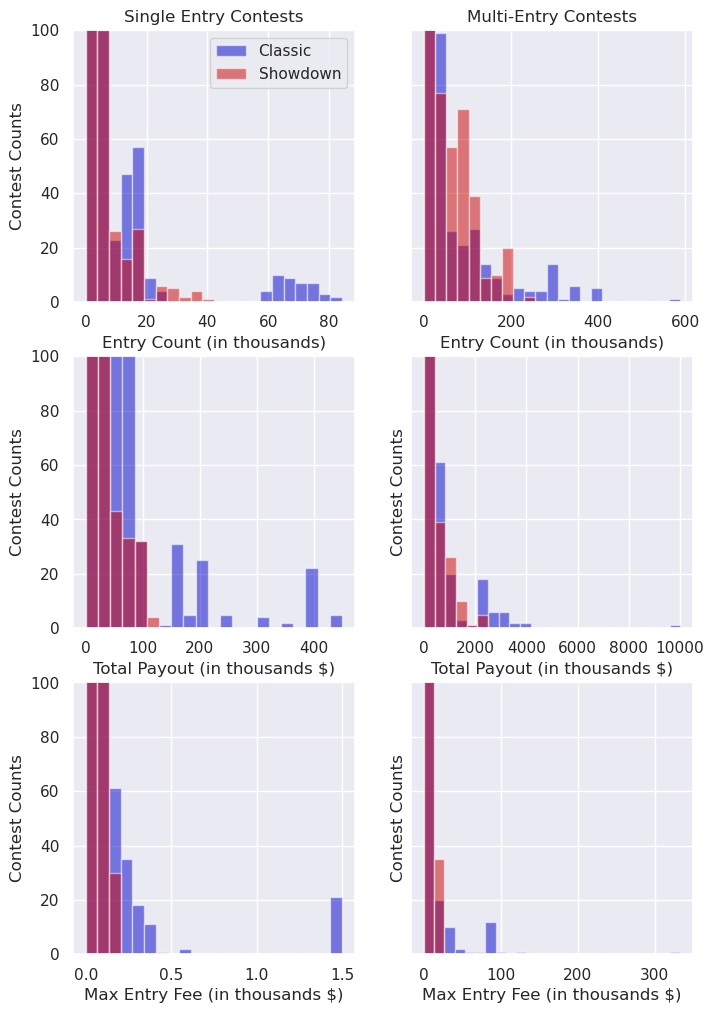

In [31]:
# payouts and number of entries break down by contest_type and multientry

unique_contests = usage_data_nonzero.groupby('contest_id').first().reset_index().copy()


filter_classic = (unique_contests['contest_type'] == 'Classic')
filter_showdown = (unique_contests['contest_type'] == 'Showdown')
filter_multientry = (unique_contests['multientry'] > 1)

_, ax = plt.subplots(3, 2, figsize=(8, 12), sharey='row')

plt.sca(ax[0][0])
_, bins, _ = plt.hist(unique_contests.loc[filter_classic & ~filter_multientry, 'entry_count']/1000., color=color_classic, alpha=0.5, bins='doane', label='Classic')
plt.hist(unique_contests.loc[filter_showdown & ~filter_multientry, 'entry_count']/1000., bins=bins, color=color_showdown, alpha=0.5, label='Showdown')
plt.ylabel('Contest Counts')
plt.legend()
plt.xlabel('Entry Count (in thousands)')
plt.title('Single Entry Contests')
# plt.xticks(rotation=45)
plt.ylim([0, 100])

plt.sca(ax[0][1])
_, bins, _ = plt.hist(unique_contests.loc[filter_classic & filter_multientry, 'entry_count']/1000., color=color_classic, alpha=0.5, bins='doane')
plt.hist(unique_contests.loc[filter_showdown & filter_multientry, 'entry_count']/1000., bins=bins, color=color_showdown, alpha=0.5)
# ax[0][1].yaxis.set_label_position("right")
plt.xlabel('Entry Count (in thousands)')
plt.title('Multi-Entry Contests')
# plt.xticks(rotation=45)
plt.ylim([0, 100])

plt.sca(ax[1][0])
_, bins, _ = plt.hist(unique_contests.loc[filter_classic & ~filter_multientry, 'payout']/1000., color=color_classic, alpha=0.5, bins='doane')
plt.hist(unique_contests.loc[filter_showdown & ~filter_multientry, 'payout']/1000., bins=bins, color=color_showdown, alpha=0.5)
plt.ylabel('Contest Counts')
plt.xlabel('Total Payout (in thousands $)')
plt.ylim([0, 100])

plt.sca(ax[1][1])
_, bins, _ = plt.hist(unique_contests.loc[filter_classic & filter_multientry, 'payout']/1000., color=color_classic, alpha=0.5, bins='doane')
plt.hist(unique_contests.loc[filter_showdown & filter_multientry, 'payout']/1000., bins=bins, color=color_showdown, alpha=0.5)
plt.ylabel('Contest Counts')
plt.xlabel('Total Payout (in thousands $)')
plt.ylim([0, 100])

plt.sca(ax[2][0])
_, bins, _ = plt.hist(unique_contests.loc[filter_classic & ~filter_multientry, 'max_entry_fee']/1000., color=color_classic, alpha=0.5, bins='doane')
plt.hist(unique_contests.loc[filter_showdown & ~filter_multientry, 'max_entry_fee']/1000., bins=bins, color=color_showdown, alpha=0.5)
plt.ylabel('Contest Counts')
plt.xlabel('Max Entry Fee (in thousands $)')
plt.ylim([0, 100])

plt.sca(ax[2][1])
_, bins, _ = plt.hist(unique_contests.loc[filter_classic & filter_multientry, 'max_entry_fee']/1000., color=color_classic, alpha=0.5, bins='doane')
plt.hist(unique_contests.loc[filter_showdown & filter_multientry, 'max_entry_fee']/1000., bins=bins, color=color_showdown, alpha=0.5)
plt.ylabel('Contest Counts')
plt.xlabel('Max Entry Fee (in thousands $)')
plt.ylim([0, 100])

plt.savefig(FIGURE_PATH / 'contest_payouts_entry_counts.png', bbox_inches='tight', dpi=300)
plt.show()

In [7]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
print(usage_data_nonzero['entry_count'].describe())
pd.reset_option('display.float_format')

count   2964817
mean       8432
std       35558
min          32
25%         178
50%         474
75%        2869
max      588343
Name: entry_count, dtype: float64


[-6, -4, -2, 0]


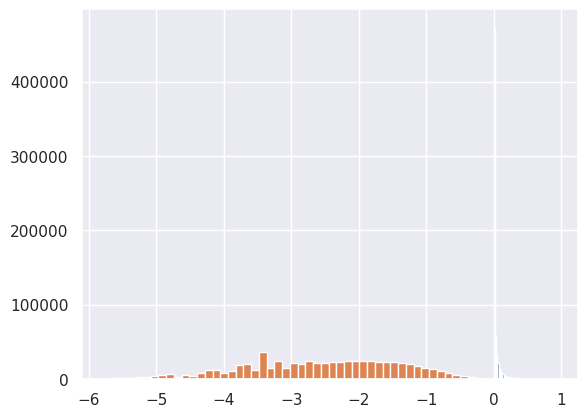

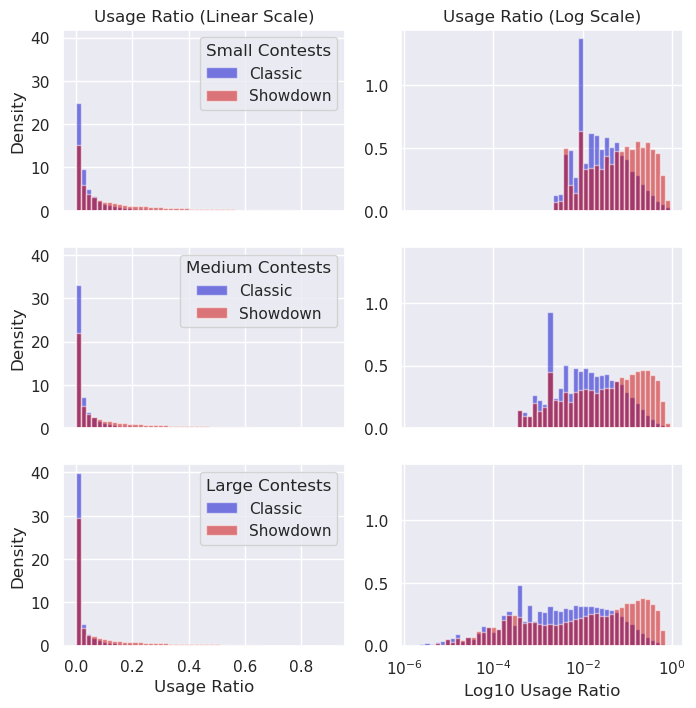

In [50]:
import matplotlib.pyplot as plt

filter_classic = (usage_data_nonzero['contest_type'] == 'Classic')
filter_showdown = (usage_data_nonzero['contest_type'] == 'Showdown')
filter_small = (usage_data_nonzero['entry_count'] < 474)
filter_medium = (usage_data_nonzero['entry_count'] >= 474) & (usage_data_nonzero['entry_count'] < 2869)
filter_large = (usage_data_nonzero['entry_count'] >= 2869)

loop_var = [
    (filter_small, 'Small'),
    (filter_medium, 'Medium'),
    (filter_large, 'Large')
]
nbins = 50

_, lin_bins, _ = plt.hist(usage_data_nonzero.loc[filter_classic & filter_large, 'usage_ratio'], bins=nbins, label='Classic')
_, log_bins, _ = plt.hist(usage_data_nonzero.loc[filter_classic & filter_large, 'log_usage'], bins=nbins, label='Classic')

_, ax = plt.subplots(3, 2, figsize=(8, 8), sharex='col', sharey='col')

for row_idx, (size_filter, label) in enumerate(loop_var):
    plt.sca(ax[row_idx, 0])
    
    # plt.plot([], [], '', label=f'{label} Contests')
    _, classic_bins, _ = plt.hist(usage_data_nonzero.loc[filter_classic & size_filter, 'usage_ratio'], bins=lin_bins, color=color_classic, alpha=0.5, density=True, label='Classic')
    _, showdown_bins, _ = plt.hist(usage_data_nonzero.loc[filter_showdown & size_filter, 'usage_ratio'], bins=lin_bins, color=color_showdown, alpha=0.5, density=True, label='Showdown')
    plt.ylabel('Density')
    plt.legend(title=f'{label} Contests')
    plt.sca(ax[row_idx, 1])
    # plt.hist(np.log10(data.loc[filter_gt_0_usage & filter_classic & size_filter, 'usage_ratio']), bins=np.log10(classic_bins), color=color_classic, alpha=0.5,  density=True)
    plt.hist(usage_data_nonzero.loc[filter_classic & size_filter, 'log_usage'], bins=log_bins, color=color_classic, alpha=0.5,  density=True)
    # plt.hist(np.log10(data.loc[filter_gt_0_usage & filter_showdown & size_filter, 'usage_ratio']), bins=np.log10(showdown_bins), color=color_showdown, alpha=0.5,  density=True)
    plt.hist(usage_data_nonzero.loc[filter_showdown & size_filter, 'log_usage'], bins=log_bins, color=color_showdown, alpha=0.5,  density=True)
    if row_idx == 0:
        plt.sca(ax[row_idx, 0])
        plt.title('Usage Ratio (Linear Scale)')
        plt.sca(ax[row_idx, 1])
        plt.title('Usage Ratio (Log Scale)')
    if row_idx == 2:
        plt.sca(ax[row_idx, 0])
        plt.xlabel('Usage Ratio')
        plt.sca(ax[row_idx, 1])
        plt.xlabel('Log10 Usage Ratio')
        xticks = [-6, -4, -2, 0]
        print(xticks)
        ax[row_idx, 1].set_xticks(xticks)
        ax[row_idx, 1].set_xticklabels([f'$10^{{{x}}}$' for x in xticks])
    
plt.savefig(FIGURE_PATH / 'usage_ratio_distributions_by_contest_size.png', bbox_inches='tight', dpi=300)
plt.show()